# PROYECTO FINAL NLP

### PROYECTO FINAL NLP

### Presentado Por:  Nadia Ñustes Pardo

1. Iniciamos llamando las librerías que vamos a utilizar

In [155]:
import pandas as pd
import tweepy
from textblob import TextBlob
import re
import time
from pprint import pprint
import json
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import googletrans
from googletrans import Translator

2. Realizamos el proceso de autenticación en la Api

In [27]:
keys = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Claves_NLP_Twitter.txt", header=None)

In [28]:
keys = dict(zip(keys[0],keys[1]))

In [29]:
logueo = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
logueo.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(logueo, wait_on_rate_limit=True)

3. Realizamos la recolección de Información

In [5]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'4.649178,-74.062827,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [6]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x00000122AE79B948>, _json={'created_at': 'Sat Nov 28 04:42:36 +0000 2020', 'id': 1332545404668440576, 'id_str': '1332545404668440576', 'full_text': '@juan_joar Que hermosura es esta? 🔥😈🔥', 'truncated': False, 'display_text_range': [11, 37], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'juan_joar', 'name': 'Juan act', 'id': 1278192696524496896, 'id_str': '1278192696524496896', 'indices': [0, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1332330886600269828, 'in_reply_to_status_id_str': '1332330886600269828', 'in_reply_to_user_id': 1278192696524496896, 'in_reply_to_user_id_str': '1278192696524496896', 'in_reply_to_screen_name': 'juan_joar', 'user': {'id': 203204003, 'id_str': '203204003', 'name': 'Ace', 'screen_name': 'gatofire09', 'location': 'BOGOTÁ', 'de

In [8]:
t._json

{'created_at': 'Fri Nov 27 11:59:33 +0000 2020',
 'id': 1332292979093090305,
 'id_str': '1332292979093090305',
 'full_text': 'RT @AUGUSTOOCAMPO: Y los medios engañados por Nestor Humberto con la edición de un video, presentado fuera de contexto ? \n\nLuego de la reve…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'AUGUSTOOCAMPO',
    'name': 'AUGUSTO A OCAMPO',
    'id': 142465457,
    'id_str': '142465457',
    'indices': [3, 17]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 149981613,
  'id_str': '149981613',
  'name': '#LideresSocialesEnLaCPI',
  'screen_name': 'ColombiaMuisca',


In [9]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)
    

In [10]:
datos = pd.DataFrame(t)

In [11]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,Bogota,1332292978229075969,https://twitter.com/i/web/status/1332292978229...
1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,"Bogotá, Colombia",1332292973078298630,https://twitter.com/i/web/status/1332292973078...
2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,Bogotá-Colombia,1332292960571039745,https://twitter.com/i/web/status/1332292960571...
3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,"Buenos Aires, Argentina",1332292960562589696,https://twitter.com/i/web/status/1332292960562...
4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,Bogotá - Colombia,1332292945920266243,https://twitter.com/i/web/status/1332292945920...
...,...,...,...,...,...,...
1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá,,1332289333278232576,https://twitter.com/i/web/status/1332289333278...
1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá,"Madrid, Colombia",1332289332598681602,https://twitter.com/i/web/status/1332289332598...
1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá,"Zipaquirá, Colombia",1332289331210366979,https://twitter.com/i/web/status/1332289331210...
1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá,Popayán / iles Nariño,1332289331080392704,https://twitter.com/i/web/status/1332289331080...


In [13]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá
...,...,...,...
1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá
1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá
1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá
1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá


In [14]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets.csv'
datos.to_csv(ruta)

In [15]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'6.25184,-75.56359,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [16]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:25:52 +0000 2020', 'id': 1332329799008792576, 'id_str': '1332329799008792576', 'full_text': '@agudelo_m jajajaajajjajaajajajajajajaja q putas!!!', 'truncated': False, 'display_text_range': [11, 51], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'agudelo_m', 'name': 'Juan David Agudelo De FontanarRossa 🌺', 'id': 296479872, 'id_str': '296479872', 'indices': [0, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1332229601020538880, 'in_reply_to_status_id_str': '1332229601020538880', 'in_reply_to_user_id': 296479872, 'in_reply_to_user_id_str': '296479872', 'in_reply_to_screen_name': 'agudelo_m', 'user': {'id': 744765798363840513, 'id_str': '744765798363840513', 'name': 'Apolo', 'screen_name': 'apolocartacho', 'location': 

In [17]:
t._json

{'created_at': 'Fri Nov 27 14:25:52 +0000 2020',
 'id': 1332329799008792576,
 'id_str': '1332329799008792576',
 'full_text': '@agudelo_m jajajaajajjajaajajajajajajaja q putas!!!',
 'truncated': False,
 'display_text_range': [11, 51],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'agudelo_m',
    'name': 'Juan David Agudelo De FontanarRossa 🌺',
    'id': 296479872,
    'id_str': '296479872',
    'indices': [0, 10]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': 1332229601020538880,
 'in_reply_to_status_id_str': '1332229601020538880',
 'in_reply_to_user_id': 296479872,
 'in_reply_to_user_id_str': '296479872',
 'in_reply_to_screen_name': 'agudelo_m',
 'user': {'id': 744765798363840513,
  'id_str': '744765798363840513',
  'name': 'Apolo',
  'screen_name': 'apolocartacho',
  'location': 'Medellín, Colombia',

In [18]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Medellín")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [19]:
datos = pd.DataFrame(t)

In [20]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,@chuchoagudelo1 @LeonelJ24 @JPABLO96331135 @JP...,2020-11-27 14:25:49,Medellín,"Medellín, Colombia",1332329787474448392,https://twitter.com/i/web/status/1332329787474...
1,@jwniebubble @treasuremembers Si te pasan algu...,2020-11-27 14:25:49,Medellín,mi casita :),1332329786673405960,https://twitter.com/i/web/status/1332329786673...
2,@jecrir La gente está loca! 😂,2020-11-27 14:25:49,Medellín,"Rionegro, Colombia",1332329786363039749,https://twitter.com/i/web/status/1332329786363...
3,RT @_josele__: Luis Carlos Velez tiene bloquea...,2020-11-27 14:25:48,Medellín,Colombia,1332329784618192900,https://twitter.com/i/web/status/1332329784618...
4,"@MinSeg Son geniales, desde el minuto 1 dijero...",2020-11-27 14:25:46,Medellín,Holanda,1332329773373263876,https://twitter.com/i/web/status/1332329773373...
...,...,...,...,...,...,...
1494,@Glopame3_02F Buenos días 🌞 abrazos 🤗 bendicio...,2020-11-27 14:03:41,Medellín,medellin,1332324218172825601,https://twitter.com/i/web/status/1332324218172...
1495,"@Falabella_co son unos ladrones, yo compré alg...",2020-11-27 14:03:41,Medellín,"Medellín, Colombia",1332324215945646082,https://twitter.com/i/web/status/1332324215945...
1496,@PerlaToro Sí señora. Mi primera foto en mi se...,2020-11-27 14:03:40,Medellín,"Medellín, Colombia",1332324212493565954,https://twitter.com/i/web/status/1332324212493...
1497,RT @Army097l: En 27 dias de noviembre BTS ha g...,2020-11-27 14:03:40,Medellín,,1332324212250390531,https://twitter.com/i/web/status/1332324212250...


In [21]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,@chuchoagudelo1 @LeonelJ24 @JPABLO96331135 @JP...,2020-11-27 14:25:49,Medellín
1,@jwniebubble @treasuremembers Si te pasan algu...,2020-11-27 14:25:49,Medellín
2,@jecrir La gente está loca! 😂,2020-11-27 14:25:49,Medellín
3,RT @_josele__: Luis Carlos Velez tiene bloquea...,2020-11-27 14:25:48,Medellín
4,"@MinSeg Son geniales, desde el minuto 1 dijero...",2020-11-27 14:25:46,Medellín
...,...,...,...
1494,@Glopame3_02F Buenos días 🌞 abrazos 🤗 bendicio...,2020-11-27 14:03:41,Medellín
1495,"@Falabella_co son unos ladrones, yo compré alg...",2020-11-27 14:03:41,Medellín
1496,@PerlaToro Sí señora. Mi primera foto en mi se...,2020-11-27 14:03:40,Medellín
1497,RT @Army097l: En 27 dias de noviembre BTS ha g...,2020-11-27 14:03:40,Medellín


In [22]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_medellin.csv'
datos.to_csv(ruta)

In [23]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'10.96854,-74.78132,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [24]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:35:31 +0000 2020', 'id': 1332332228790132738, 'id_str': '1332332228790132738', 'full_text': 'Se respira una paz 🙏🏼', 'truncated': False, 'display_text_range': [0, 21], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 702948212995465216, 'id_str': '702948212995465216', 'name': 'Rafael David Mejia Villamil', 'screen_name': 'raa121089', 'location': 'Soledad, Colombia', 'description': '100% juniorista. 100% fiel a mi filosofía (un alto en el camino). fue un 12 de mayo 2018😍 = 20/10/2020 👶🏼', 'url': None, 'entities': {'description': {'ur

In [25]:
t._json

{'created_at': 'Fri Nov 27 14:35:31 +0000 2020',
 'id': 1332332228790132738,
 'id_str': '1332332228790132738',
 'full_text': 'Se respira una paz 🙏🏼',
 'truncated': False,
 'display_text_range': [0, 21],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 702948212995465216,
  'id_str': '702948212995465216',
  'name': 'Rafael David Mejia Villamil',
  'screen_name': 'raa121089',
  'location': 'Soledad, Colombia',
  'description': '100% juniorista. 100% fiel a mi filosofía (un alto en el camino). fue un 12 de mayo 2018😍 = 20/10/2020 👶🏼',
  'url': None,
  'entities': {'description': {'urls': []}},
  'protected': False,
  'f

In [27]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Barranquilla")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [28]:
datos = pd.DataFrame(t)

In [29]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,"RT @cDaniel1508: Uy, desde antes del 15. Ya to...",2020-11-27 14:18:57,Barranquilla,"Lima, Perú",1332328059110903810,https://twitter.com/i/web/status/1332328059110...
1,@INSColombia del @ministeriosalud dice en est...,2020-11-27 14:18:57,Barranquilla,Barranquilla,1332328059098308611,https://twitter.com/i/web/status/1332328059098...
2,Agárrenme hpta,2020-11-27 14:18:57,Barranquilla,"Barranquilla, Colombia",1332328058112659456,https://twitter.com/i/web/status/1332328058112...
3,"RT @JuanSalvadorB: Junior díassss, una decisi...",2020-11-27 14:18:56,Barranquilla,"Misuri, USA",1332328055579291655,https://twitter.com/i/web/status/1332328055579...
4,Kim Jong-un ordenó ejecutar a dos personas y p...,2020-11-27 14:18:56,Barranquilla,"Valledupar, Cesar, Colombia",1332328053280747522,https://twitter.com/i/web/status/1332328053280...
...,...,...,...,...,...,...
358,@IsabeLHdz05 O un Enano 😂😂,2020-11-27 14:13:43,Barranquilla,"Barranquilla, Colombia",1332326743378698240,https://twitter.com/i/web/status/1332326743378...
359,RT @FernandOdont: Escribo para recordarles que...,2020-11-27 14:13:42,Barranquilla,,1332326739301773314,https://twitter.com/i/web/status/1332326739301...
360,Ya se dieron cuenta las feministas que no pued...,2020-11-27 14:13:41,Barranquilla,"Barranquilla, Colombia",1332326733824077827,https://twitter.com/i/web/status/1332326733824...
361,Ya Petro destrozó las vidas de muchos magistra...,2020-11-27 14:13:40,Barranquilla,"Cartagena, Colombia",1332326728547643399,https://twitter.com/i/web/status/1332326728547...


In [30]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,"RT @cDaniel1508: Uy, desde antes del 15. Ya to...",2020-11-27 14:18:57,Barranquilla
1,@INSColombia del @ministeriosalud dice en est...,2020-11-27 14:18:57,Barranquilla
2,Agárrenme hpta,2020-11-27 14:18:57,Barranquilla
3,"RT @JuanSalvadorB: Junior díassss, una decisi...",2020-11-27 14:18:56,Barranquilla
4,Kim Jong-un ordenó ejecutar a dos personas y p...,2020-11-27 14:18:56,Barranquilla
...,...,...,...
358,@IsabeLHdz05 O un Enano 😂😂,2020-11-27 14:13:43,Barranquilla
359,RT @FernandOdont: Escribo para recordarles que...,2020-11-27 14:13:42,Barranquilla
360,Ya se dieron cuenta las feministas que no pued...,2020-11-27 14:13:41,Barranquilla
361,Ya Petro destrozó las vidas de muchos magistra...,2020-11-27 14:13:40,Barranquilla


In [31]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_barranquilla.csv'
datos.to_csv(ruta)

In [33]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'3.43722,-76.5225,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [34]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:47:18 +0000 2020', 'id': 1332335195253567490, 'id_str': '1332335195253567490', 'full_text': '"Si algo me pasa, los quiero", un corto animado de tan solo 12 minutos que te hará llorar. \n#Netflix #SiAlgoMePasaLosQuiero #moods', 'truncated': False, 'display_text_range': [0, 130], 'entities': {'hashtags': [{'text': 'Netflix', 'indices': [92, 100]}, {'text': 'SiAlgoMePasaLosQuiero', 'indices': [101, 123]}, {'text': 'moods', 'indices': [124, 130]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1272996667, 'id_str': '1272996667', 'name': 'Alexis lml', 'screen_n

In [35]:
t._json

{'created_at': 'Fri Nov 27 14:47:18 +0000 2020',
 'id': 1332335195253567490,
 'id_str': '1332335195253567490',
 'full_text': '"Si algo me pasa, los quiero", un corto animado de tan solo 12 minutos que te hará llorar. \n#Netflix #SiAlgoMePasaLosQuiero #moods',
 'truncated': False,
 'display_text_range': [0, 130],
 'entities': {'hashtags': [{'text': 'Netflix', 'indices': [92, 100]},
   {'text': 'SiAlgoMePasaLosQuiero', 'indices': [101, 123]},
   {'text': 'moods', 'indices': [124, 130]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1272996667,
  'id_str': '1272996667',
  'name': 'Alexis lml',
  'screen_name': 'alexisj19970',
  'location

In [36]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Cali")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [37]:
datos = pd.DataFrame(t)

In [38]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,@SantiagoSotoS10 😍😍😍😍😍😍😍😍 agradézcanme porfa y...,2020-11-27 14:47:18,Cali,"Guadalajara de Buga, Colombia",1332335193848483842,https://twitter.com/i/web/status/1332335193848...
1,Quiero volver a tener 5 años 😞.,2020-11-27 14:47:18,Cali,Colombia,1332335192472760321,https://twitter.com/i/web/status/1332335192472...
2,Acaba de publicar una foto https://t.co/5zdhPq...,2020-11-27 14:47:17,Cali,colombia,1332335191663267843,https://twitter.com/i/web/status/1332335191663...
3,¡Buenos días mi señora divina! @victoriaruffo3...,2020-11-27 14:47:17,Cali,Colombia,1332335190350458883,https://twitter.com/i/web/status/1332335190350...
4,Desde Muy temprano en #ForosMIRA con la inform...,2020-11-27 14:47:17,Cali,Colombia,1332335189025026048,https://twitter.com/i/web/status/1332335189025...
...,...,...,...,...,...,...
1494,"RT @AdrianaLucia: Debería estar preso pero no,...",2020-11-27 14:40:18,Cali,Colombia RTMirar ♡Save,1332333432869969923,https://twitter.com/i/web/status/1332333432869...
1495,"@juliosolis_09 @jhonjamesmoreno Oe sejj, me di...",2020-11-27 14:40:18,Cali,Buenaventura,1332333431615877120,https://twitter.com/i/web/status/1332333431615...
1496,@conyapari Igual mi cony 💓🙏🙏🙏,2020-11-27 14:40:18,Cali,Colombia,1332333431418712065,https://twitter.com/i/web/status/1332333431418...
1497,RT @ValentinaAB10: Si realmente entendiéramos ...,2020-11-27 14:40:18,Cali,,1332333431137644549,https://twitter.com/i/web/status/1332333431137...


In [39]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,@SantiagoSotoS10 😍😍😍😍😍😍😍😍 agradézcanme porfa y...,2020-11-27 14:47:18,Cali
1,Quiero volver a tener 5 años 😞.,2020-11-27 14:47:18,Cali
2,Acaba de publicar una foto https://t.co/5zdhPq...,2020-11-27 14:47:17,Cali
3,¡Buenos días mi señora divina! @victoriaruffo3...,2020-11-27 14:47:17,Cali
4,Desde Muy temprano en #ForosMIRA con la inform...,2020-11-27 14:47:17,Cali
...,...,...,...
1494,"RT @AdrianaLucia: Debería estar preso pero no,...",2020-11-27 14:40:18,Cali
1495,"@juliosolis_09 @jhonjamesmoreno Oe sejj, me di...",2020-11-27 14:40:18,Cali
1496,@conyapari Igual mi cony 💓🙏🙏🙏,2020-11-27 14:40:18,Cali
1497,RT @ValentinaAB10: Si realmente entendiéramos ...,2020-11-27 14:40:18,Cali


In [40]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_cali.csv'
datos.to_csv(ruta)

In [49]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'7.12539,-73.1198,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [50]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:58:44 +0000 2020', 'id': 1332338069509431296, 'id_str': '1332338069509431296', 'full_text': '@quinterojose98 @Paulanrodri09 Esa es la actitud🤪', 'truncated': False, 'display_text_range': [31, 49], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'quinterojose98', 'name': 'Jose David', 'id': 1164887140527984642, 'id_str': '1164887140527984642', 'indices': [0, 15]}, {'screen_name': 'Paulanrodri09', 'name': 'PaulaRodríguez', 'id': 1103850312547348480, 'id_str': '1103850312547348480', 'indices': [16, 30]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1332334056407756800, 'in_reply_to_status_id_str': '1332334056407756800', 'in_reply_to_user_id': 1164887140527984642, 'in_reply_to_user_id_str': '1164887140527984642', 

In [51]:
t._json

{'created_at': 'Fri Nov 27 14:58:44 +0000 2020',
 'id': 1332338069509431296,
 'id_str': '1332338069509431296',
 'full_text': '@quinterojose98 @Paulanrodri09 Esa es la actitud🤪',
 'truncated': False,
 'display_text_range': [31, 49],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'quinterojose98',
    'name': 'Jose David',
    'id': 1164887140527984642,
    'id_str': '1164887140527984642',
    'indices': [0, 15]},
   {'screen_name': 'Paulanrodri09',
    'name': 'PaulaRodríguez',
    'id': 1103850312547348480,
    'id_str': '1103850312547348480',
    'indices': [16, 30]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1332334056407756800,
 'in_reply_to_status_id_str': '1332334056407756800',
 'in_reply_to_user_id': 1164887140527984642,
 'in_reply_to_user_id_str': '1164887140527984642',
 'in_reply_t

In [52]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bucaramanga")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [53]:
datos = pd.DataFrame(t)

In [54]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,RT @BLUSantanderes: Cuarenta niños que partici...,2020-11-27 14:58:41,Bucaramanga,"Bogotá, D.C., Colombia",1332338060453883906,https://twitter.com/i/web/status/1332338060453...
1,Bastan 11 minutos de Lanthimos en Nimic para d...,2020-11-27 14:58:41,Bucaramanga,"Bucaramanga, Colombia",1332338058591674369,https://twitter.com/i/web/status/1332338058591...
2,@Raviolico1 @z3r0__0 @ZulemaVictoria3 Jajajaja...,2020-11-27 14:58:38,Bucaramanga,"Bucaramanga, Colombia",1332338044754677766,https://twitter.com/i/web/status/1332338044754...
3,Congreso de la República: Respaldo abierto al ...,2020-11-27 14:58:34,Bucaramanga,"Bucaramanga, Colombia",1332338029441245184,https://twitter.com/i/web/status/1332338029441...
4,"@laurapa9807 Feliz día también para sumercé, m...",2020-11-27 14:58:30,Bucaramanga,Bucaramanga,1332338010717904897,https://twitter.com/i/web/status/1332338010717...
...,...,...,...,...,...,...
1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga,"Bucaramanga, Colombia",1332314748482957319,https://twitter.com/i/web/status/1332314748482...
1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga,,1332314741268762625,https://twitter.com/i/web/status/1332314741268...
1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga,"Barrancabermeja, Colombia",1332314740798971905,https://twitter.com/i/web/status/1332314740798...
1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga,"Galapagar, España",1332314739913986050,https://twitter.com/i/web/status/1332314739913...


In [55]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,RT @BLUSantanderes: Cuarenta niños que partici...,2020-11-27 14:58:41,Bucaramanga
1,Bastan 11 minutos de Lanthimos en Nimic para d...,2020-11-27 14:58:41,Bucaramanga
2,@Raviolico1 @z3r0__0 @ZulemaVictoria3 Jajajaja...,2020-11-27 14:58:38,Bucaramanga
3,Congreso de la República: Respaldo abierto al ...,2020-11-27 14:58:34,Bucaramanga
4,"@laurapa9807 Feliz día también para sumercé, m...",2020-11-27 14:58:30,Bucaramanga
...,...,...,...
1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga
1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga
1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga
1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga


In [56]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bucaramanga.csv'
datos.to_csv(ruta)

Cargue y union de tweets recolectados por ciudad

In [203]:
bogota = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bogota.csv")
medellin = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_medellin.csv")
cali = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_cali.csv")
barranquilla = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_barranquilla.csv")
bucaramanga = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bucaramanga.csv")

df = pd.concat([bogota, medellin, cali, barranquilla, bucaramanga])
df

,Unnamed: 0,tweet,date,city
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá
...,...,...,...,...
1494,1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga
1495,1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga
1496,1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga
1497,1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga


Realizamos la exploración de tweets en el dataframe unificado df

In [8]:
df.columns

Index(['Unnamed: 0', 'tweet', 'date', 'city'], dtype='object')

In [9]:
cantidad = df['tweet'].count()

In [10]:
print ('Cantidad de tweets recolectados:' , cantidad)

Cantidad de tweets recolectados: 6359


In [11]:
cant_ciudad = df.groupby(['city']).size().reset_index(name = 'cantidad_tweets')
cant_ciudad

,city,cantidad_tweets
0,Barranquilla,363
1,Bogotá,1499
2,Bucaramanga,1499
3,Cali,1499
4,Medellín,1499


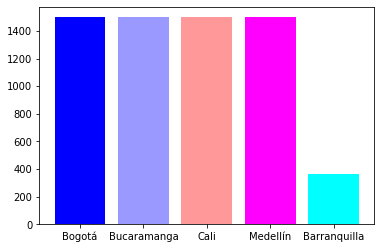

In [12]:
cant_ciudad = cant_ciudad.sort_values('cantidad_tweets', ascending = False)
plt.bar(cant_ciudad['city'],cant_ciudad['cantidad_tweets'], color = ['blue','#9999ff','#ff9999','magenta','cyan'], label='cantidad_tweets')
plt.show()


Se realizó un llamado de tweets de 1500 registros de los cuales para la ciudad de barranquilla se obtuvieron 363, por lo cual tenemos la siguiente participación de tweets por ciudad.

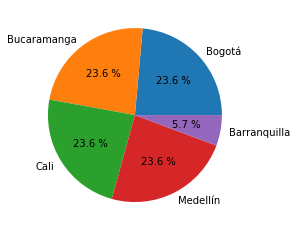

In [13]:
plt.pie(cant_ciudad['cantidad_tweets'], labels = cant_ciudad['city'], autopct = "%0.1f %%")
plt.show()

Debido a inconvenientes con la variable Translator el análisis se realiza para la ciudad de Bogotá

In [204]:
df = bogota
df.head()

,Unnamed: 0,tweet,date,city
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá


Preprocesamiento de la información
El preprocesamiento nos permite limpiar el contenido de los tweets

In [205]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<ipython-input-205-3ea2fc60d431>:3: DeprecationWarning: invalid escape sequence \s
  pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
<ipython-input-205-3ea2fc60d431>:4: DeprecationWarning: invalid escape sequence \s
  pattern2 = '?P<url>https?://[^\s]+'


In [206]:
df[['tweet_clean', 'links_2', 'hashtags', 'mentions']] = df.apply(text_clean, axis=1, result_type='expand')

In [207]:
df.head(2000)

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:]
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[]
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco]
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:]
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[]
...,...,...,...,...,...,...,...,...
1494,1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá,"RT Que esas encuestas son rechimbas, son com...",[],[],"[@CAVENDISH09:, @lcvelez]"
1495,1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá,...,[],[],"[@urbimaria37, @neliafique, @Vzla_asediada, @S..."
1496,1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá,A ti te doy hasta la clave de mi cel.,[],[],[]
1497,1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá,RT ¿Qué canción es su máquina del tiempo?,[https://t.co/HWsGql7OOW],[],[@themusicpimp:]


Luego de la limpieza de tweets iniciamos con la aplicación del análisis de sentimiento, pero primero debemos traducir el contenido del tweet_clean para aplicar la función

In [274]:
from langdetect import detect, detect_langs

In [275]:
    from googletrans import Translator

In [279]:
translator = Translator()
df['ing'] = df['tweet_clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ..."
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ..."
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con..."
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud..."
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de..."


In [280]:
df['ingles_trad'] = df['ing'].apply(lambda valor: valor.text)
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ...",RT Acaba de quedar en evidencia el complot pa...
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ...",En la vereda Cataimita se sienten abandonados ...
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con...","Hola, si consideras vulnerados tus derechos, ..."
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud...",RT en Salud: \nEscocia se convierte en el pr...
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de...",| Precios del petróleo vienen con tendencia a...


In [281]:
vader = SentimentIntensityAnalyzer()

df['sentimiento'] = df['ingles_trad'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
df.head()      


,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad,sentimiento
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ...",RT Acaba de quedar en evidencia el complot pa...,0.0
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ...",En la vereda Cataimita se sienten abandonados ...,0.0
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con...","Hola, si consideras vulnerados tus derechos, ...",0.0
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud...",RT en Salud: \nEscocia se convierte en el pr...,0.0
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de...",| Precios del petróleo vienen con tendencia a...,0.0


In [282]:
df = df[['tweet_clean', 'sentimiento']].sort_values('sentimiento')
df.head(1500)

,tweet_clean,sentimiento
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951
144,Parce nooooooo! 😭😭😭,-0.8622
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264
419,la empresa llevó una semana solicitando ate...,-0.8038
...,...,...
1134,Así es \nLA VIDA es lo que importa. \n✌✌✌💙,0.9300
1149,AMÉN 🙏 GRACIAS ❤ ENITH. IGUAL PARA TI UN ABRA...,0.9468
661,AMÉN 🙏 GRACIAS ❤ CARMEN.. GRACIAS POR TU SALU...,0.9682
1414,AMÉN 🙏 GRACIAS ❤ SCARCARLETT. FELIZ DÍA. BEND...,0.9732


Tweets más positivos 🤗

In [208]:
df.loc[1022]['tweet']

'@IsaSierra_ La mujer más hermosa de Monteria.\nNo hay palabras para explicar tanta belleza\n😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍'

In [209]:
df.loc[1414]['tweet']

'@scamagalla AMÉN 🙏 GRACIAS ❤ SCARCARLETT. FELIZ DÍA. BENDICIONES Y UN ABRAZO 🤗 CUIDATE MUCHO. ♥ FELIZ FINDE. ♥ 🤗 ♥️ https://t.co/niMRspvoJP'

In [210]:
df.loc[661]['tweet']

'@cga2805 AMÉN 🙏 GRACIAS ❤ CARMEN.. GRACIAS POR TU SALUDO. ASÍ ES AMIGA. TODO CON CALMA ES MEJOR. QUE TENGAS UN EXCELENTE DÍA. BENDICIONES Y UN ABRAZO 🤗 CUIDATE MUCHO. ♥ 🤗 🤗 ♥️ FELIZ FIN DE SEMANA. https://t.co/xnpDcL99Cf'

Tweets más Negativos 😢

In [211]:
df.loc[688]['tweet']

'Yo viendo los spoilers de The Mandalorian porque es tendencia mundial.\n\nEMOS ZIDO VENDESIDOS\n\nGracias, Dave 😭😭😭😭 https://t.co/FygAnMG0oK'

In [212]:
df.loc[1188]['tweet']

'Crean en ustedes, crean en el proceso y lo más importante no dejen de intentar.\nHoy orgullosamente soy selección Caldas para el campeonato nacional de Downhill 2020.\nValio la pena, cada levantada en la madrugada lo valió todo, cada sufrimiento valió!!!\n💥🔥🔥🔥🚴🏼\u200d♀️ https://t.co/ddhnLtpZtw'

In [213]:
df.loc[1115]['tweet']

'@RevistaSemana Que horror Tomas Uribe! De política no conoce, y eso, la teoría. Y vaya que la práctica, no la puede practicar con nosotros. Sería un país lleno de caos, manipulados por los que se tildan de conocedores entre otros Alvaro Uribe. Amparamos Dios!'

In [289]:
df[['tweet_clean', 'sentimiento']].head(100)

,tweet_clean,sentimiento
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951
144,Parce nooooooo! 😭😭😭,-0.8622
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264
419,la empresa llevó una semana solicitando ate...,-0.8038
...,...,...
489,"RT Dichosos los que tienen en quien confiar, ...",-0.5267
692,"RT el representante ""Hasta que no nos vacun...",-0.5267
67,"Mi abuela llegó de sorpresa para grado, despué...",-0.5267
1486,"el representante ""Si nosotros no tenemos la ...",-0.5267


In [290]:
df[df.sentimiento > 0.5][['tweet_clean', 'sentimiento']].head()

,tweet_clean,sentimiento
1213,Lindo viernes!😍,0.5093
162,Que hermosa nuestra mamita María! 😍🙏🏻,0.5093
239,RT “Nada es más honorable que un corazón agra...,0.5423
232,RT “Nada es más honorable que un corazón agra...,0.5423
405,“Nada es más honorable que un corazón agradeci...,0.5423


In [294]:
Positivos = df[df.sentimiento > 0.5][['tweet_clean', 'sentimiento']].head(500)
Positivos

,tweet_clean,sentimiento
1213,Lindo viernes!😍,0.5093
162,Que hermosa nuestra mamita María! 😍🙏🏻,0.5093
239,RT “Nada es más honorable que un corazón agra...,0.5423
232,RT “Nada es más honorable que un corazón agra...,0.5423
405,“Nada es más honorable que un corazón agradeci...,0.5423
229,"RT el mejor, NINGUNO ha hecho tantas obras y...",0.5859
109,Jajaja xd,0.5859
1272,Hoy comienza la burbuja del voleibol en Colomb...,0.5859
731,RT ¿Cuál fue la primer consola en la que juga...,0.5994
540,RT Los ojitos de amor con los que te mira tu ...,0.6124


In [295]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

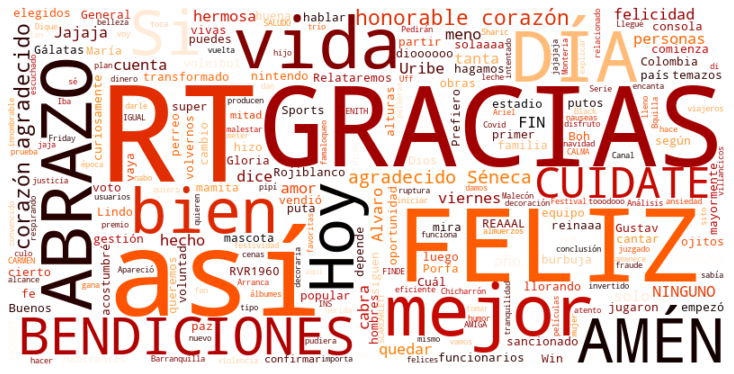

In [296]:
palabras = Positivos.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [299]:
Negativos = df[df.sentimiento < 0 ][['tweet_clean', 'sentimiento']].head(1000)
Negativos

,tweet_clean,sentimiento
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951
144,Parce nooooooo! 😭😭😭,-0.8622
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264
419,la empresa llevó una semana solicitando ate...,-0.8038
...,...,...
1045,"Argumentos de Paloma V para defender a NHM: ""e...",-0.2023
1206,Gracias por la difusión a la música nacion...,-0.1531
1263,"No señora, no exagere que señora tan complicada.",-0.0803
458,No . No es la única,-0.0803


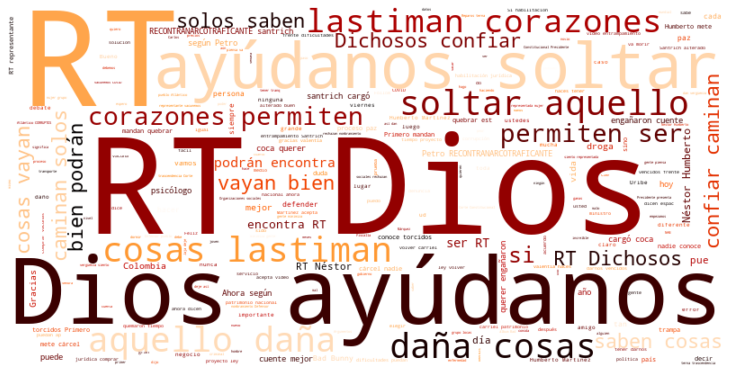

In [300]:
palabras = Negativos.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [304]:
Neutros = df[df.sentimiento == 0 ][['tweet_clean', 'sentimiento']].head(1000)
Neutros

,tweet_clean,sentimiento
1008,RT Buenos días Mundo para todos,0.0
1002,RT nombrar de Embajadores a fiscales corrupt...,0.0
1062,Trato de sacar lo mucho que dejaste acá adentr...,0.0
1014,"Las mafias se protegen entre ellos mismos, má...",0.0
1001,RT En una operación conjunta y coordinada de ...,0.0
...,...,...
517,Amén.,0.0
518,Más Parece un entramado de petro y sus colega...,0.0
519,Oigan y vean esto,0.0
544,Acaba de publicar una foto,0.0


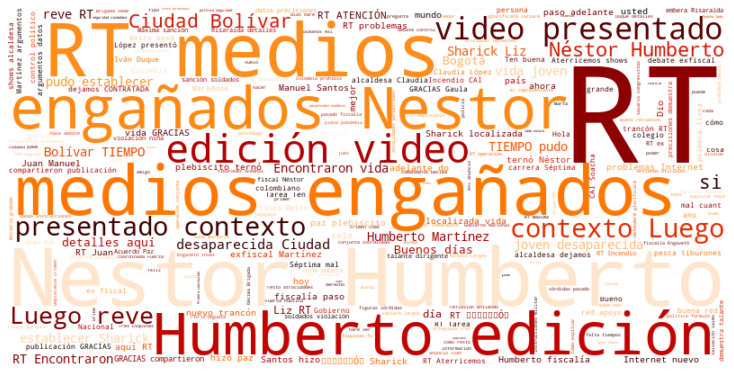

In [305]:
palabras = Neutros.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [117]:
def x_range(x):
   if x > 0:
    return 'Positivo'
   elif x == 0:
    return 'Neutro'
   else:
    return 'Negativo'

In [118]:
df['result'] = df['sentimiento'].apply(x_range)
df.head()

,tweet_clean,sentimiento,result
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081,Negativo
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951,Negativo
144,Parce nooooooo! 😭😭😭,-0.8622,Negativo
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264,Negativo
419,la empresa llevó una semana solicitando ate...,-0.8038,Negativo


In [121]:
cantidad = df.groupby(['result']).size().reset_index(name = 'cantidad_tweets')
cantidad

,result,cantidad_tweets
0,Negativo,314
1,Neutro,1067
2,Positivo,118


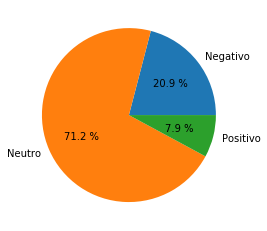

In [124]:
plt.pie(cant_ciudad['cantidad_tweets'], labels = cant_ciudad['result'], autopct = "%0.1f %%")
plt.show()

Se puede observar que los Retweets no aportaron valor en el análisis anterior por lo cual procedemos a realizar el llamado excluyéndolos y volvemos a realizar el ejercicio

In [41]:
tweets = tweepy.Cursor(api.search,q=" -filter:retweets",
                       lang='es',
                       geocode=f'4.649178,-74.062827,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(200)

In [42]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000001FDC81AF108>, _json={'created_at': 'Sat Dec 05 05:54:13 +0000 2020', 'id': 1335100143784370176, 'id_str': '1335100143784370176', 'full_text': '@poikahmusica Así será.', 'truncated': False, 'display_text_range': [14, 23], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'poikahmusica', 'name': 'PᴏɪᴋᴀH 🇨🇴', 'id': 56741342, 'id_str': '56741342', 'indices': [0, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1335099785364320256, 'in_reply_to_status_id_str': '1335099785364320256', 'in_reply_to_user_id': 56741342, 'in_reply_to_user_id_str': '56741342', 'in_reply_to_screen_name': 'poikahmusica', 'user': {'id': 47105698, 'id_str': '47105698', 'name': '🏳️\u200d🌈🌿♫２０００MAKE A NOISE RILLABOOM BOOM BOOM ♫🌿', 'screen_name': '2000dePan', 'location': 'Bogotá, Colombia', 

In [43]:
t._json

{'created_at': 'Sat Dec 05 05:54:13 +0000 2020',
 'id': 1335100143784370176,
 'id_str': '1335100143784370176',
 'full_text': '@poikahmusica Así será.',
 'truncated': False,
 'display_text_range': [14, 23],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'poikahmusica',
    'name': 'PᴏɪᴋᴀH 🇨🇴',
    'id': 56741342,
    'id_str': '56741342',
    'indices': [0, 13]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1335099785364320256,
 'in_reply_to_status_id_str': '1335099785364320256',
 'in_reply_to_user_id': 56741342,
 'in_reply_to_user_id_str': '56741342',
 'in_reply_to_screen_name': 'poikahmusica',
 'user': {'id': 47105698,
  'id_str': '47105698',
  'name': '🏳️\u200d🌈🌿♫２０００MAKE A NOISE RILLABOOM BOOM BOOM ♫🌿',
  'screen_name': '2000dePan',
  'location': 'Bogotá, Colombia',
  'description': '🏳️\

In [44]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [45]:
datos = pd.DataFrame(t)

In [46]:

datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos


,tweet,date,city,user_location,id,link
0,@mariapaulab14 Lo mereces como nadie mi amor 😍...,2020-12-05 05:54:11,Bogotá,"Bogotá, Colombia.",1335100132807892992,https://twitter.com/i/web/status/1335100132807...
1,@Mat_Q12 Hay cada imbecil...!!!,2020-12-05 05:54:10,Bogotá,BOGOTA,1335100128101855233,https://twitter.com/i/web/status/1335100128101...
2,@FabianOjedaEmpr buena noche me interesa lo de...,2020-12-05 05:54:07,Bogotá,Bogota- Colombia,1335100118316486656,https://twitter.com/i/web/status/1335100118316...
3,Vaciando el alma y el corazón...,2020-12-05 05:54:07,Bogotá,"Tolima, Colombia",1335100115254702080,https://twitter.com/i/web/status/1335100115254...
4,“Eran tantos jugadores que me era imposible ve...,2020-12-05 05:54:06,Bogotá,Bogotá.,1335100113576923136,https://twitter.com/i/web/status/1335100113576...
...,...,...,...,...,...,...
194,@Raforismos Además de tener mucha gente amable...,2020-12-05 05:45:53,Bogotá,,1335098043532709889,https://twitter.com/i/web/status/1335098043532...
195,"@YoAlejoV Jajajajaja, ¿y todo bien... o tampoc...",2020-12-05 05:45:52,Bogotá,"Bogotá, Colombia",1335098042056323072,https://twitter.com/i/web/status/1335098042056...
196,No quiero estar aquí,2020-12-05 05:45:52,Bogotá,"Armenia, Colombia",1335098040034746368,https://twitter.com/i/web/status/1335098040034...
197,Hoy me dijeron que iba a formar parte de un pr...,2020-12-05 05:45:52,Bogotá,"Bogotá, D.C., Colombia",1335098039078432769,https://twitter.com/i/web/status/1335098039078...


In [47]:
datos = datos[['tweet','date','city']]
datos.head(200)


,tweet,date,city
0,@mariapaulab14 Lo mereces como nadie mi amor 😍...,2020-12-05 05:54:11,Bogotá
1,@Mat_Q12 Hay cada imbecil...!!!,2020-12-05 05:54:10,Bogotá
2,@FabianOjedaEmpr buena noche me interesa lo de...,2020-12-05 05:54:07,Bogotá
3,Vaciando el alma y el corazón...,2020-12-05 05:54:07,Bogotá
4,“Eran tantos jugadores que me era imposible ve...,2020-12-05 05:54:06,Bogotá
...,...,...,...
194,@Raforismos Además de tener mucha gente amable...,2020-12-05 05:45:53,Bogotá
195,"@YoAlejoV Jajajajaja, ¿y todo bien... o tampoc...",2020-12-05 05:45:52,Bogotá
196,No quiero estar aquí,2020-12-05 05:45:52,Bogotá
197,Hoy me dijeron que iba a formar parte de un pr...,2020-12-05 05:45:52,Bogotá


In [48]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bogota_sinRT.csv'
datos.to_csv(ruta)


In [188]:
df = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bogota_sinRT.csv")

In [190]:
df.head()

,Unnamed: 0,tweet,date,city
0,0,@mariapaulab14 Lo mereces como nadie mi amor 😍...,2020-12-05 05:54:11,Bogotá
1,1,@Mat_Q12 Hay cada imbecil...!!!,2020-12-05 05:54:10,Bogotá
2,2,@FabianOjedaEmpr buena noche me interesa lo de...,2020-12-05 05:54:07,Bogotá
3,3,Vaciando el alma y el corazón...,2020-12-05 05:54:07,Bogotá
4,4,“Eran tantos jugadores que me era imposible ve...,2020-12-05 05:54:06,Bogotá


Preprocesamiento de la información El preprocesamiento nos permite limpiar el contenido de los tweets

In [191]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \s
<ipython-input-191-3ea2fc60d431>:3: DeprecationWarning: invalid escape sequence \s
  pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
<ipython-input-191-3ea2fc60d431>:4: DeprecationWarning: invalid escape sequence \s
  pattern2 = '?P<url>https?://[^\s]+'


In [192]:
df[['tweet_clean', 'links_2', 'hashtags', 'mentions']] = df.apply(text_clean, axis=1, result_type='expand')

In [193]:
df.head()  

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions
0,0,@mariapaulab14 Lo mereces como nadie mi amor 😍...,2020-12-05 05:54:11,Bogotá,Lo mereces como nadie mi amor 😍 gracias por e...,[],[],[@mariapaulab14]
1,1,@Mat_Q12 Hay cada imbecil...!!!,2020-12-05 05:54:10,Bogotá,Hay cada imbecil...!!!,[],[],[@Mat_Q12]
2,2,@FabianOjedaEmpr buena noche me interesa lo de...,2020-12-05 05:54:07,Bogotá,buena noche me interesa lo de bitcoin no pued...,[],[],[@FabianOjedaEmpr]
3,3,Vaciando el alma y el corazón...,2020-12-05 05:54:07,Bogotá,Vaciando el alma y el corazón...,[],[],[]
4,4,“Eran tantos jugadores que me era imposible ve...,2020-12-05 05:54:06,Bogotá,“Eran tantos jugadores que me era imposible ve...,[https://t.co/Ik1K6UlmdT],[],[]


Luego de la limpieza de tweets iniciamos nuevamente con la aplicación del análisis de sentimiento, pero primero debemos traducir el contenido del tweet_clean para aplicar la función.
Debido a que la librería de googletrans presentó inconvenientes, se realiza el cálculo del sentimiento utilizando la libreria TextBlob


In [59]:
from textblob import TextBlob

In [66]:
def get_polarity(text):
    analysis = TextBlob(text)
    if text != '':
        if analysis.detect_language() == 'es':
            result = analysis.translate(from_lang = 'es', to = 'en').sentiment.polarity
            time.sleep(5)
            return result

In [67]:
df['Sentimiento'] = df['tweet_clean'].apply(get_polarity)

Observamos el resultado del sentimiento de los 5 primeros Tweets

In [68]:
df['Sentimiento'].head(5)

0    0.750000
1    0.000000
2    0.475000
3    0.000000
4   -0.138889
Name: Sentimiento, dtype: float64

Para poder visualizar de mejor forma el resultado del análisis, creamos una variable que nos permita clasificar el tipo de sentimiento.

In [69]:
def x_range(x):
   if x > 0:
    return 'Positivo'
   elif x == 0:
    return 'Neutro'
   else:
    return 'Negativo'

In [83]:
df['Tipo_sentimiento'] = df['Sentimiento'].apply(x_range)
df.head(10)

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,Sentimiento,Tipo_sentimiento
0,0,@mariapaulab14 Lo mereces como nadie mi amor 😍...,2020-12-05 05:54:11,Bogotá,Lo mereces como nadie mi amor 😍 gracias por e...,[],[],[@mariapaulab14],Lo mereces como nadie mi amor 😍 gracias por e...,0.750000,Positivo
1,1,@Mat_Q12 Hay cada imbecil...!!!,2020-12-05 05:54:10,Bogotá,Hay cada imbecil...!!!,[],[],[@Mat_Q12],Hay cada imbecil...!!!,0.000000,Neutro
2,2,@FabianOjedaEmpr buena noche me interesa lo de...,2020-12-05 05:54:07,Bogotá,buena noche me interesa lo de bitcoin no pued...,[],[],[@FabianOjedaEmpr],buena noche me interesa lo de bitcoin no pued...,0.475000,Positivo
3,3,Vaciando el alma y el corazón...,2020-12-05 05:54:07,Bogotá,Vaciando el alma y el corazón...,[],[],[],Vaciando el alma y el corazón...,0.000000,Neutro
4,4,“Eran tantos jugadores que me era imposible ve...,2020-12-05 05:54:06,Bogotá,“Eran tantos jugadores que me era imposible ve...,[https://t.co/Ik1K6UlmdT],[],[],“Eran tantos jugadores que me era imposible ve...,-0.138889,Negativo
5,5,"Despertar a esta hora y tar yogurt, es mi pasión.",2020-12-05 05:54:04,Bogotá,"Despertar a esta hora y tar yogurt, es mi pasión.",[],[],[],"Despertar a esta hora y tar yogurt, es mi pasión.",0.000000,Neutro
6,6,Ustedes estuvieron en la época de twitter en q...,2020-12-05 05:54:03,Bogotá,Ustedes estuvieron en la época de twitter en q...,[],[],[],Ustedes estuvieron en la época de twitter en q...,-0.050000,Negativo
7,7,@senorapao2021 Bienvenidos,2020-12-05 05:54:01,Bogotá,Bienvenidos,[],[],[@senorapao2021],Bienvenidos,0.800000,Positivo
8,8,"Toy triste, lleguen con nudes al dm 😔",2020-12-05 05:53:58,Bogotá,"Toy triste, lleguen con nudes al dm 😔",[],[],[],"Toy triste, lleguen con nudes al dm 😔",-0.500000,Negativo
9,9,@lilondra ¡Esa si es una canción!,2020-12-05 05:53:53,Bogotá,¡Esa si es una canción!,[],[],[@lilondra],¡Esa si es una canción!,0.000000,Neutro


In [85]:
df[['tweet_clean','Tipo_sentimiento']].sort_values('Tipo_sentimiento')

,tweet_clean,Tipo_sentimiento
136,Estará filoso el cuchillo?,Negativo
153,Y que hago con tu busito 🥺💔,Negativo
147,Clarita.,Negativo
145,Donde están los jurados? ya es sábado &gt;:(,Negativo
134,Estoy arrepentida si que estoy arrepentida\nNo...,Negativo
...,...,...
126,"Borracho, feliz. Y tu?",Positivo
122,jajajajjaaja,Positivo
54,Ese Chicho Arango está muy volador...,Positivo
135,"Se cancela la tusa, estoy deliciosa.",Positivo


In [ ]:
Validamos la distribución de los datos de acuerdo a la clasificación.

In [71]:
df['Tipo_sentimiento'].value_counts()

Positivo    79
Neutro      74
Negativo    46
Name: Tipo_sentimiento, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

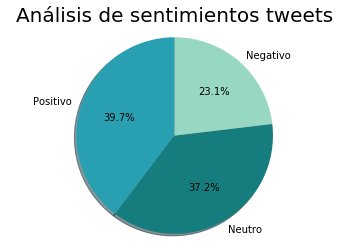

In [74]:
import matplotlib.pyplot as plt
labels = 'Positivo','Neutro','Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['Tipo_sentimiento'].value_counts(),labels=labels, colors=colors,
       autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Análisis de sentimientos tweets',fontsize = 20)
plt.axis('equal')
plt.show

Observamos en la nube las palabras con mayor frecuencia en los tweets

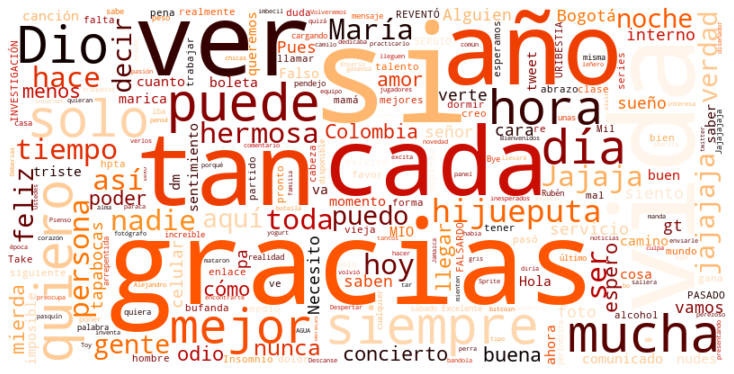

In [76]:
from wordcloud import WordCloud

palabras = df.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [80]:
df.tweet_clean.iloc[10]

' Se me va el internet a cada rato 😕'

In [92]:
df[['tweet_clean','Sentimiento','Tipo_sentimiento']].sort_values('Tipo_sentimiento')

,tweet_clean,Sentimiento,Tipo_sentimiento
136,Estará filoso el cuchillo?,-0.125000,Negativo
153,Y que hago con tu busito 🥺💔,-0.187500,Negativo
147,Clarita.,NaN,Negativo
145,Donde están los jurados? ya es sábado &gt;:(,-0.750000,Negativo
134,Estoy arrepentida si que estoy arrepentida\nNo...,-0.333333,Negativo
...,...,...,...
126,"Borracho, feliz. Y tu?",0.150000,Positivo
122,jajajajjaaja,0.200000,Positivo
54,Ese Chicho Arango está muy volador...,0.200000,Positivo
135,"Se cancela la tusa, estoy deliciosa.",1.000000,Positivo


Tweets Positivos

In [93]:
df.loc[0]['tweet_clean']

' Lo mereces como nadie mi amor 😍 gracias por existir y hacer de mi vida la mejor'

In [94]:
df.loc[135]['tweet_clean']

'Se cancela la tusa, estoy deliciosa.'

In [96]:
df.loc[126]['tweet_clean']

' Borracho, feliz. Y tu?'

In [146]:
Positivos = df[df.Sentimiento > 0.5][['tweet_clean', 'Sentimiento']].head()
Positivos

,tweet_clean,Sentimiento
0,Lo mereces como nadie mi amor 😍 gracias por e...,0.75
7,Bienvenidos,0.80
40,🤣🤣🤣 mka y lo mejor es que he visto los goles ...,1.00
42,"Todo bien, excepto la vida en sí.",0.70
47,Ser absolutamente feliz con tu mejor amiga,0.90


Generamos una Nube de Palabras para observar los Tweets más positivos

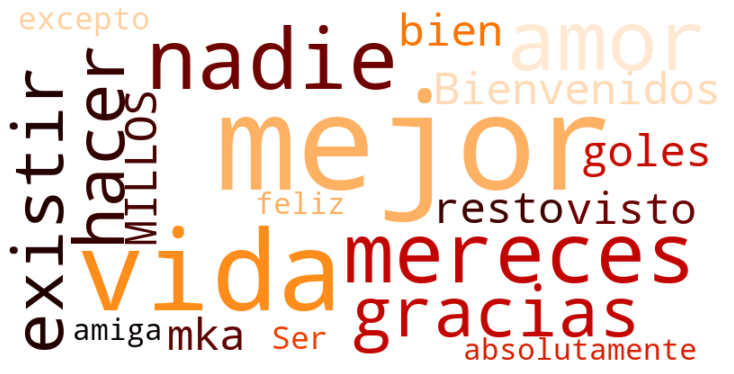

In [148]:
palabras = Positivos.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

Tweets Negativos

In [97]:
df.loc[136]['tweet_clean']

'Estará filoso el cuchillo? '

In [98]:
df.loc[145]['tweet_clean']

'  Donde están los jurados? ya es sábado &gt;:('

In [99]:
df.loc[134]['tweet_clean']

'Estoy arrepentida si que estoy arrepentida\nNo estoy pidiendo que tú vuelvas\nPero cómo quisiera QUE NUNCA TE HUBIERAS IDO🙄☹️🎤'

In [149]:
Negativos = df[df.Sentimiento < 0][['tweet_clean', 'Sentimiento']].head()
Negativos

,tweet_clean,Sentimiento
4,“Eran tantos jugadores que me era imposible ve...,-0.138889
6,Ustedes estuvieron en la época de twitter en q...,-0.050000
8,"Toy triste, lleguen con nudes al dm 😔",-0.500000
19,La mierda de Colombia es con toda su bando...,-0.200000
20,Tengo un sentimiento de amor odio con que mis ...,-0.066667


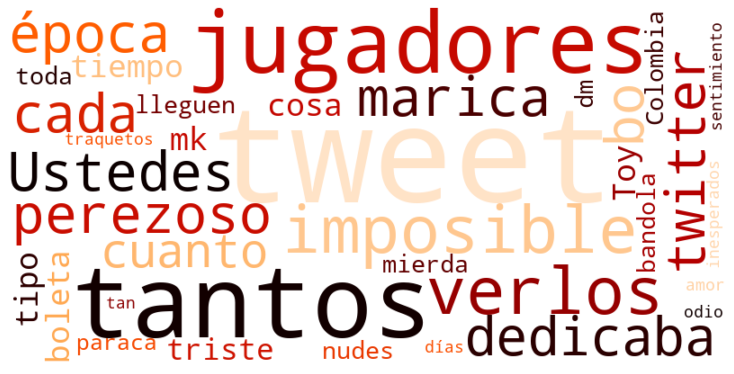

In [150]:
palabras = Negativos.tweet_clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [194]:
data = pd.DataFrame(df['tweet_clean'])
data

,tweet_clean
0,Lo mereces como nadie mi amor 😍 gracias por e...
1,Hay cada imbecil...!!!
2,buena noche me interesa lo de bitcoin no pued...
3,Vaciando el alma y el corazón...
4,“Eran tantos jugadores que me era imposible ve...
...,...
194,"Además de tener mucha gente amable, que sin d..."
195,"Jajajajaja, ¿y todo bien... o tampoco está se..."
196,No quiero estar aquí
197,Hoy me dijeron que iba a formar parte de un pr...


Realizamos la limpieza de los datos los tweets

In [195]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.strip() # Quitar espacios del principio
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

data['Pre-Processed'] = data['tweet_clean'].apply(lambda texto: pre_procesado(texto))
data.head()

,tweet_clean,Pre-Processed
0,Lo mereces como nadie mi amor 😍 gracias por e...,"[mereces, nadie, amor, gracias, existir, hacer..."
1,Hay cada imbecil...!!!,"[cada, imbecil]"
2,buena noche me interesa lo de bitcoin no pued...,"[buena, noche, interesa, bitcoin, puedo, envia..."
3,Vaciando el alma y el corazón...,"[vaciando, alma, corazón]"
4,“Eran tantos jugadores que me era imposible ve...,"[tantos, jugadores, imposible, verlos, perezoso]"


Creamos un Diccionario para el conjunto de datos

In [196]:
from gensim.corpora import Dictionary
dictionary = Dictionary(data['Pre-Processed'].values)

Frecuencia de palabras, más frecuentes y menos frecuentes

In [197]:
dictionary.filter_extremes(no_below=5, no_above=0.5)
dictionary.token2id

{'gracias': 0,
 'mejor': 1,
 'vida': 2,
 'cada': 3,
 'hora': 4,
 'si': 5,
 'hoy': 6,
 'siempre': 7,
 'tan': 8,
 'dios': 9,
 'solo': 10,
 'ser': 11,
 'maría': 12,
 'quiero': 13,
 'ver': 14,
 'jajaja': 15,
 'año': 16,
 'hijueputa': 17,
 'hermosa': 18,
 'así': 19}

In [198]:
corpus = [dictionary.doc2bow(text) for text in data['Pre-Processed'].values]

Entrenamos el modelo con 100 pases

In [199]:
from gensim.models import LdaModel

In [200]:
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=200)

In [201]:
model.print_topics(num_words = 50)

[(0,
  '0.361*"si" + 0.195*"tan" + 0.171*"quiero" + 0.171*"solo" + 0.030*"hoy" + 0.005*"hijueputa" + 0.005*"cada" + 0.005*"dios" + 0.005*"siempre" + 0.005*"ver" + 0.005*"gracias" + 0.005*"así" + 0.005*"mejor" + 0.005*"jajaja" + 0.005*"ser" + 0.005*"hora" + 0.005*"vida" + 0.005*"maría" + 0.005*"hermosa" + 0.005*"año"'),
 (1,
  '0.379*"año" + 0.274*"maría" + 0.169*"jajaja" + 0.011*"vida" + 0.011*"gracias" + 0.011*"si" + 0.011*"dios" + 0.011*"tan" + 0.011*"solo" + 0.011*"así" + 0.011*"hoy" + 0.011*"quiero" + 0.011*"siempre" + 0.011*"hijueputa" + 0.011*"ser" + 0.011*"cada" + 0.011*"mejor" + 0.011*"hora" + 0.011*"ver" + 0.011*"hermosa"'),
 (2,
  '0.465*"vida" + 0.340*"ver" + 0.053*"gracias" + 0.008*"dios" + 0.008*"hijueputa" + 0.008*"solo" + 0.008*"cada" + 0.008*"ser" + 0.008*"mejor" + 0.008*"siempre" + 0.008*"si" + 0.008*"año" + 0.008*"tan" + 0.008*"así" + 0.008*"jajaja" + 0.008*"hoy" + 0.008*"quiero" + 0.008*"hora" + 0.008*"maría" + 0.008*"hermosa"'),
 (3,
  '0.231*"cada" + 0.230*"hora" +

Generamos un gráfico de clasificación para evaluar la clasificación de los Tweets

In [202]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

C:\Users\Nadia\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
